<a href="https://colab.research.google.com/github/amrrahman1/Classification-Tree-Exercise-Practice-/blob/main/Classification_Tree_Exercise_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = '/content/drive/MyDrive/cancer.csv'

df = pd.read_csv(filename)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Pre Processing

In [ ]:
df['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [ ]:
df['diagnosis'] = df['diagnosis'].replace({'B':0 ,'M':1})

In [ ]:
X = df.drop(columns ='diagnosis')
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

#### Decision Tree Classifier Model

In [ ]:
dec_tree = DecisionTreeClassifier(random_state = 42)

In [ ]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.951048951048951


#### Bagged Trees Classifier model

In [ ]:
bagged = BaggingClassifier(random_state = 42)

In [ ]:
bagged.fit(X_train, y_train)


BaggingClassifier(random_state=42)

In [ ]:
bagged_train_score = bagged.score(X_train, y_train)
bagged_test_score = bagged.score(X_test, y_test)
print(bagged_train_score)
print(bagged_test_score)

0.9929577464788732
0.951048951048951


#### Random Forests Model

In [ ]:
rf = RandomForestClassifier(random_state = 42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

1.0
0.972027972027972


In [ ]:
# Importing the Confusion matrix

from sklearn.metrics import plot_confusion_matrix



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


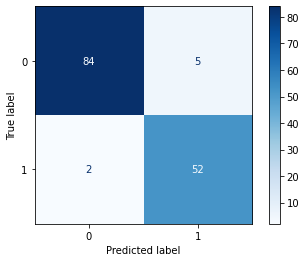

In [ ]:
# Confusion Marics for the decision tree model
plot_confusion_matrix(dec_tree, X_test, y_test, cmap = 'Blues');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


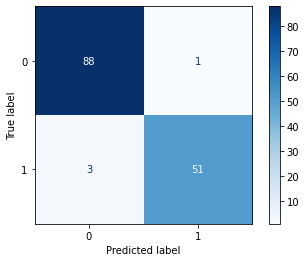

In [ ]:
# Confusion Matrix for the Bagged Trees model
plot_confusion_matrix(rf, X_test, y_test, cmap = 'Blues');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


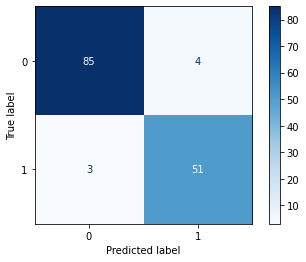

In [ ]:
# Confusion Matrix for the Random Forests model
plot_confusion_matrix(bagged, X_test, y_test, cmap = 'Blues');

#####1) What was the accuracy of the model? (You should have already determined this for the classification tree exercise)
Answer : The Model Accuracy was 95 %

#####2) Which condition (Malignant or Benign) is considered the positive class in this data set?
####Answer : Benign is the positive Class.

#####3) How many false positives were there? 
Answer: 4.

#####4) How many false negatives were there?
17

######5) For the breast cancer data set, which do you think is more problematic: false positives or false negatives? Explain.
Answer : False Negative represent 2.09% percent of the sample while False positive represent 2.79% so False positive is more problamtic